In [3]:
import pandas as pd

DIRECTORY = "../data/raw/26.csv"
# Download from https://data.gov.lt/dataset/darbdaviu-duomenys

df = pd.read_csv(DIRECTORY, delimiter="	")

display(df)


,iraso_data,Juridiniu_asmenu_duomenys__juridinio_asmens_kodas,juridinio_asmens_pavadinimas,teisines_formos_kodas,teisine_forma,teisinio_statuso_kodas,teisinis_statusas,Iregistravimo_data,buveines_adresas
0,2022-10-26,120500430.0,"Uždaroji akcinė bendrovė ""MIKROAUTOBUSAS""",1,Juridiniai asmenys,1.0,Įregistruotas,1991-03-07,"Vilniaus miesto sav., Vilnius, Meistrų g. 16-13"
1,2017-08-16,165707056.0,"UAB ""Axis Industries""",1,Juridiniai asmenys,1.0,Įregistruotas,1993-06-17,"Vilniaus miesto sav., Vilnius, Ozo g. 12A-1"
2,2012-01-12,183711152.0,"UŽDAROJI AKCINĖ BENDROVĖ ""STATVA""",1,Juridiniai asmenys,4.0,Išregistruotas,1993-04-19,"Utenos r. sav., Utena, Aušros g. 80"
3,2013-01-14,110516817.0,Bendra Lietuvos-Vokietijos įmonė uždaroji akci...,1,Juridiniai asmenys,1.0,Įregistruotas,1993-07-08,"Marijampolės sav., Marijampolė, Gedimino g. 14"
4,2013-08-23,144127089.0,"UAB ""Šiaulių apželdinimas""",1,Juridiniai asmenys,1.0,Įregistruotas,1990-12-14,"Šiaulių miesto sav., Šiauliai, Pagėgių g. 72"
...,...,...,...,...,...,...,...,...,...
1411087,2014-05-06,303094577.0,"UAB ""Žalias kotas""",1,Juridiniai asmenys,1.0,Įregistruotas,2013-07-03,"Klaipėdos miesto sav., Klaipėda, Laukininkų g...."
1411088,2015-12-15,158806029.0,"Uždaroji akcinė bendrovė ""Kaišiadorių butų ūkis""",1,Juridiniai asmenys,1.0,Įregistruotas,1990-12-13,"Kaišiadorių rajono sav., Kaišiadorys, Girelės ..."
1411089,2012-02-14,302530121.0,"UAB ""Stelažai LT""",1,Juridiniai asmenys,4.0,Išregistruotas,2010-07-20,"Kauno m. sav., Kaunas, Europos pr. 122"
1411090,2020-09-01,302691288.0,"UAB ""Litminta""",1,Juridiniai asmenys,1.0,Įregistruotas,2011-11-28,"Klaipėdos rajono sav., Vėžaičiai, Pagerdaujo g. 2"


In [4]:
# assign year is Iregistravimo_metai
df1 = df.assign(Iregistravimo_metai=pd.to_datetime(df["Iregistravimo_data"]).dt.year)

# count jurdiniai_asmenys by year
count_juridiniai_asmenys = (
    df1.groupby(["Iregistravimo_metai"], as_index=False)[
        "Juridiniu_asmenu_duomenys__juridinio_asmens_kodas"
    ]
    .nunique()
    .assign(Iregistravimo_metai=pd.to_datetime(df["Iregistravimo_data"]).dt.year)
)

display(count_juridiniai_asmenys)


,Iregistravimo_metai,Juridiniu_asmenu_duomenys__juridinio_asmens_kodas
0,1991,2
1,1993,2
2,1993,2
3,1993,3
4,1990,2
...,...,...
59,2014,2738
60,2017,2687
61,2018,2357
62,2019,1138


None

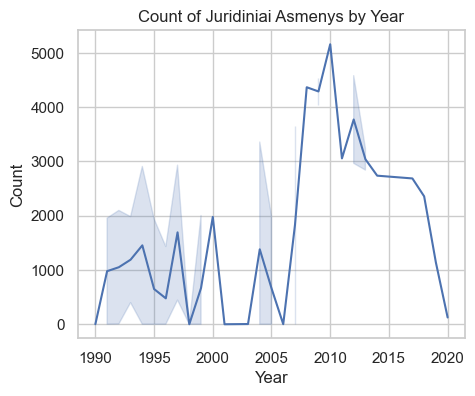

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


def count_juridiniai_asmenys_by_year(df):
    df1 = df.assign(
        Iregistravimo_metai=pd.to_datetime(df["Iregistravimo_data"]).dt.year
    )
    count_juridiniai_asmenys = (
        df1.groupby(["Iregistravimo_metai"], as_index=False)[
            "Juridiniu_asmenu_duomenys__juridinio_asmens_kodas"
        ]
        .nunique()
        .assign(Iregistravimo_metai=pd.to_datetime(df["Iregistravimo_data"]).dt.year)
    )

    return count_juridiniai_asmenys


def plot_count_juridiniai_asmenys_by_year(count_juridiniai_asmenys):
    sns.set(style="whitegrid")
    plt.figure(figsize=(5, 4))
    sns.lineplot(
        x="Iregistravimo_metai",
        y="Juridiniu_asmenu_duomenys__juridinio_asmens_kodas",
        data=count_juridiniai_asmenys,
    )
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.title("Count of Juridiniai Asmenys by Year")
    plt.savefig("count_juridiniai_asmenys.png")


display(plot_count_juridiniai_asmenys_by_year(count_juridiniai_asmenys))


In [6]:
# split buveines_adresas to municipality, city and address
df2 = df.assign(
    municipality=df["buveines_adresas"].str.split(",").str[0],
    city=df["buveines_adresas"].str.split(",").str[1],
    address=df["buveines_adresas"].str.split(",").str[2],
)

display(df2)


,iraso_data,Juridiniu_asmenu_duomenys__juridinio_asmens_kodas,juridinio_asmens_pavadinimas,teisines_formos_kodas,teisine_forma,teisinio_statuso_kodas,teisinis_statusas,Iregistravimo_data,buveines_adresas,municipality,city,address
0,2022-10-26,120500430.0,"Uždaroji akcinė bendrovė ""MIKROAUTOBUSAS""",1,Juridiniai asmenys,1.0,Įregistruotas,1991-03-07,"Vilniaus miesto sav., Vilnius, Meistrų g. 16-13",Vilniaus miesto sav.,Vilnius,Meistrų g. 16-13
1,2017-08-16,165707056.0,"UAB ""Axis Industries""",1,Juridiniai asmenys,1.0,Įregistruotas,1993-06-17,"Vilniaus miesto sav., Vilnius, Ozo g. 12A-1",Vilniaus miesto sav.,Vilnius,Ozo g. 12A-1
2,2012-01-12,183711152.0,"UŽDAROJI AKCINĖ BENDROVĖ ""STATVA""",1,Juridiniai asmenys,4.0,Išregistruotas,1993-04-19,"Utenos r. sav., Utena, Aušros g. 80",Utenos r. sav.,Utena,Aušros g. 80
3,2013-01-14,110516817.0,Bendra Lietuvos-Vokietijos įmonė uždaroji akci...,1,Juridiniai asmenys,1.0,Įregistruotas,1993-07-08,"Marijampolės sav., Marijampolė, Gedimino g. 14",Marijampolės sav.,Marijampolė,Gedimino g. 14
4,2013-08-23,144127089.0,"UAB ""Šiaulių apželdinimas""",1,Juridiniai asmenys,1.0,Įregistruotas,1990-12-14,"Šiaulių miesto sav., Šiauliai, Pagėgių g. 72",Šiaulių miesto sav.,Šiauliai,Pagėgių g. 72
...,...,...,...,...,...,...,...,...,...,...,...,...
1411087,2014-05-06,303094577.0,"UAB ""Žalias kotas""",1,Juridiniai asmenys,1.0,Įregistruotas,2013-07-03,"Klaipėdos miesto sav., Klaipėda, Laukininkų g....",Klaipėdos miesto sav.,Klaipėda,Laukininkų g. 41-70
1411088,2015-12-15,158806029.0,"Uždaroji akcinė bendrovė ""Kaišiadorių butų ūkis""",1,Juridiniai asmenys,1.0,Įregistruotas,1990-12-13,"Kaišiadorių rajono sav., Kaišiadorys, Girelės ...",Kaišiadorių rajono sav.,Kaišiadorys,Girelės g. 4
1411089,2012-02-14,302530121.0,"UAB ""Stelažai LT""",1,Juridiniai asmenys,4.0,Išregistruotas,2010-07-20,"Kauno m. sav., Kaunas, Europos pr. 122",Kauno m. sav.,Kaunas,Europos pr. 122
1411090,2020-09-01,302691288.0,"UAB ""Litminta""",1,Juridiniai asmenys,1.0,Įregistruotas,2011-11-28,"Klaipėdos rajono sav., Vėžaičiai, Pagerdaujo g. 2",Klaipėdos rajono sav.,Vėžaičiai,Pagerdaujo g. 2
